## This notebook explores using the forward Euler and default RK45 methods to integrate a damped spring-mass ODE system.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

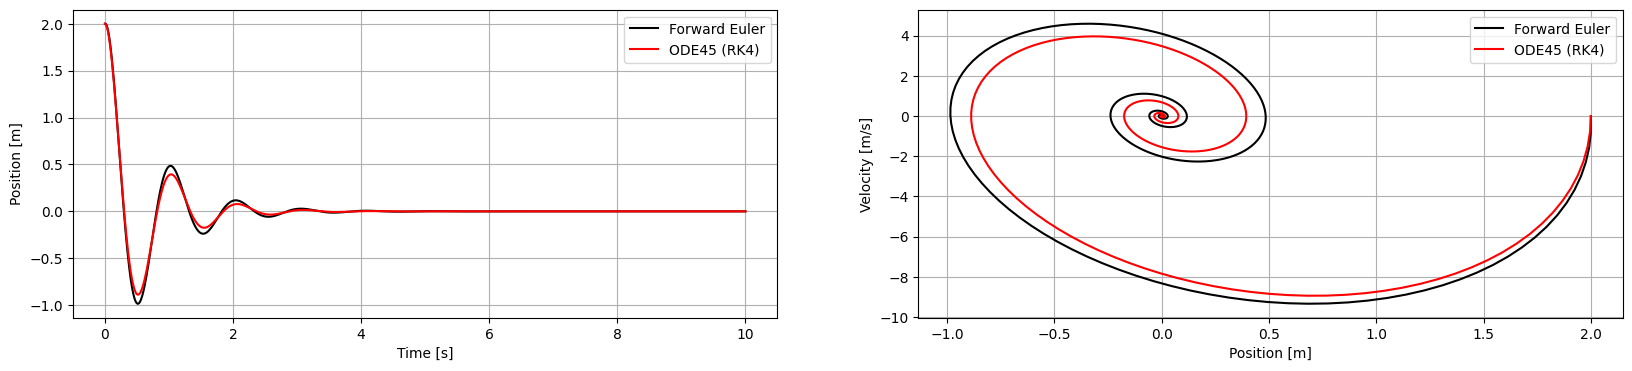

In [23]:
# play around with different 'd' and 'dt' to see various behavior!

w = 2 * np.pi  # natural frequency
d = 0.25       # damping ratio

# spring-mass-damper system
A = np.array([[0, 1], [-w ** 2, -2 * d * w]])  # \dot{x} = Ax

dt = 0.01  # time step
T = 10     # amount of time to integrate
n = int(T / dt) # n time steps
t = np.linspace(0, T, n)

x0 = [2, 0]  # initial condition (x=2, v=0)

# iterate forward Euler
xF = np.zeros((2, n))
xF[:, 0] = x0
for k in range(n - 1): 
    xF[:, k + 1] = (np.eye(2) + dt * A) @ xF[:, k]

# compute better integral using built-in python code
# 4th-order Runge Kutta 
def linear_ode(t, x):
    return A @ x  # @ symbol for matrix-vector product here

linear_ode_solution = solve_ivp(linear_ode, (0, T), x0, t_eval=t) 
xGood = linear_ode_solution.y

plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.plot(t, xF[0, :], 'k')
plt.plot(t, xGood[0, :],'r')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(xF[0, :], xF[1, :], 'k')
plt.plot(xGood[0, :], xGood[1, :], 'r')
plt.xlabel('Position [m]')
plt.ylabel('Velocity [m/s]')
plt.legend(['Forward Euler', 'ODE45 (RK4)'])
plt.grid(True)